# HW2: VECTORIZATION (Pandas style!)

## STEP 1: Import ALL the things
### Import libraries  

In [2]:
##########################################
# NOTE: I'm toying with the idea of requiring the library just above 
# when I use it so it makes more sense in context
##########################################
# import os
# import pandas as pd
# from nltk.tokenize import word_tokenize, sent_tokenize
# from nltk.sentiment import SentimentAnalyzer
# from nltk.sentiment.util import *
# from nltk.probability import FreqDist
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# sid = SentimentIntensityAnalyzer()

### Import data from files

In [5]:
import os
def get_data_from_files(path):
    directory = os.listdir(path)
    results = []
    for file in directory:
        f=open(path+file)
        results.append(f.read())
        f.close()
    return results

# neg = get_data_from_files('../NEG_JK/')
# pos = get_data_from_files('../POS_JK/')


neg = get_data_from_files('../NEG_JK_E/')
pos = get_data_from_files('../POS_JK_E/')
# neg

## STEP 2: Prep Data
### STEP 2a: Turn that fresh text into a pandas DF

In [6]:
import pandas as pd
import csv

neg_df = pd.DataFrame(neg)
pos_df = pd.DataFrame(pos)
# neg_df.to_csv('neg_joker_csv.csv',quoting=csv.QUOTE_ALL, sep='\t')
# neg_df.to_csv('neg_joker_csv.csv', index=False)
all_df = neg_df.append(pos_df)
all_df
# pos_df.to_csv('pos_joker_csv.csv', index=False)

0
0    Everyone praised an overrated movie.\nOverrat...
1    What idiotic FIlm\nI can say that Phoenix is ...
2    Terrible\nThe only thing good about this movi...
3    Watch Taxi Driver instead\nThis is a poor att...
4    I learned one thing.\nIt borrows a lot of ele...
..                                                ...
45   Masterpiece.\nThe music. The intense. The rea...
46   BELIEVE THE HYPE\nJoaquin Phoenix gives Heath...
47   Joaquin 'OSCAR', Joker = best Dark suspense t...
48   Oscar for Phoenix\nI will stop watching movie...
49   Joker > Endgame\nNeed I say more? Everything ...

[98 rows x 1 columns]

### STEP 2b: Label it

In [7]:
pos_df['PoN'] = 'P'
neg_df['PoN'] = 'N'

### STEP 2c: Combine the dfs

In [8]:
all_df = neg_df.append(pos_df)

In [12]:
all_df

all_df.to_csv('all_JK_extremes_labeled.csv', index=False)

In [22]:
all_df_no_label = all_df.drop('PoN', axis=1)
all_df_no_label
# all_df
all_df_no_label.to_csv('all_JK_extremes_no_label.csv', index=False)

## STEP 3: TOKENIZE (and clean)!!

In [8]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [9]:
## Came back and added sentences for tokinization for "Summary experiment"
def get_sentence_tokens(review):
    return sent_tokenize(review)
    
all_df['sentences'] = all_df.apply(lambda x: get_sentence_tokens(x[0]), axis=1)
all_df['num_sentences'] = all_df.apply(lambda x: len(x['sentences']), axis=1)

In [10]:
def get_tokens(sentence):
    tokens = word_tokenize(sentence)
    clean_tokens = [word.lower() for word in tokens if word.isalpha()]
    return clean_tokens

all_df['tokens'] = all_df.apply(lambda x: get_tokens(x[0]), axis=1)
all_df['num_tokens'] = all_df.apply(lambda x: len(x['tokens']), axis=1)

In [11]:
all_df

0 PoN  \
0     Missed Opportunity\nI had been very excited t...   N   
1     5/5 for Phoenix's acting..\nI don't think the...   N   
2     Everyone praised an overrated movie.\nOverrat...   N   
3     What idiotic FIlm\nI can say that Phoenix is ...   N   
4     Terrible\nThe only thing good about this movi...   N   
..                                                 ...  ..   
118   Nerve-wracking, but in very uncomfortable way...   P   
119   Solid film but there are glaring problems\nOk...   P   
120   Joker > Endgame\nNeed I say more? Everything ...   P   
121   Absolutely not a 10\nStrong fanboy and hype r...   P   
122   Overhyped, but it's alright\nIt's a good film...   P   

                                             sentences  num_sentences  \
0    [ Missed Opportunity\nI had been very excited ...              1   
1    [ 5/5 for Phoenix's acting.., I don't think th...              5   
2    [ Everyone praised an overrated movie., Overra...              2   
3    [ What idiotic FIlm\nI can say that Phoenix is...              4   
4    [ Terrible\nThe only thing good about this mov...              9   
..                                                 ...            ...   
118  [ Nerve-wracking, but in very uncomfortable wa...              8   
119  [ Solid film but there are glaring problems\nO...             13   
120  [ Joker > Endgame\nNeed I say more?, Everythin...              5   
121  [ Absolutely not a 10\nStrong fanboy and hype ...              5   
122  [ Overhyped, but it's alright\nIt's a good fil...              3   

                                                tokens  num_tokens  
0    [missed, opportunity, i, had, been, very, exci...         306  
1    [for, phoenix, i, do, think, there, was, a, ne...          59  
2    [everyone, praised, an, overrated, movie, over...          26  
3    [what, idiotic, film, i, can, say, that, phoen...          66  
4    [terrible, the, only, thing, good, about, this...         124  
..                                                 ...         ...  
118  [but, in, very, uncomfortable, way, why, every...          57  
119  [solid, film, but, there, are, glaring, proble...         628  
120  [joker, endgame, need, i, say, more, everythin...          83  
121  [absolutely, not, a, strong, fanboy, and, hype...          81  
122  [overhyped, but, it, alright, it, a, good, fil...          60  

[246 rows x 6 columns]

## STEP 4: Remove Stopwords

In [12]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
def remove_stopwords(sentence):
    filtered_text = []
    for word in sentence:
        if word not in stop_words:
            filtered_text.append(word)
    return filtered_text
all_df['no_sw'] = all_df.apply(lambda x: remove_stopwords(x['tokens']),axis=1)
all_df['num_no_sw'] = all_df.apply(lambda x: len(x['no_sw']),axis=1)

In [13]:
all_df

0 PoN  \
0     Missed Opportunity\nI had been very excited t...   N   
1     5/5 for Phoenix's acting..\nI don't think the...   N   
2     Everyone praised an overrated movie.\nOverrat...   N   
3     What idiotic FIlm\nI can say that Phoenix is ...   N   
4     Terrible\nThe only thing good about this movi...   N   
..                                                 ...  ..   
118   Nerve-wracking, but in very uncomfortable way...   P   
119   Solid film but there are glaring problems\nOk...   P   
120   Joker > Endgame\nNeed I say more? Everything ...   P   
121   Absolutely not a 10\nStrong fanboy and hype r...   P   
122   Overhyped, but it's alright\nIt's a good film...   P   

                                             sentences  num_sentences  \
0    [ Missed Opportunity\nI had been very excited ...              1   
1    [ 5/5 for Phoenix's acting.., I don't think th...              5   
2    [ Everyone praised an overrated movie., Overra...              2   
3    [ What idiotic FIlm\nI can say that Phoenix is...              4   
4    [ Terrible\nThe only thing good about this mov...              9   
..                                                 ...            ...   
118  [ Nerve-wracking, but in very uncomfortable wa...              8   
119  [ Solid film but there are glaring problems\nO...             13   
120  [ Joker > Endgame\nNeed I say more?, Everythin...              5   
121  [ Absolutely not a 10\nStrong fanboy and hype ...              5   
122  [ Overhyped, but it's alright\nIt's a good fil...              3   

                                                tokens  num_tokens  \
0    [missed, opportunity, i, had, been, very, exci...         306   
1    [for, phoenix, i, do, think, there, was, a, ne...          59   
2    [everyone, praised, an, overrated, movie, over...          26   
3    [what, idiotic, film, i, can, say, that, phoen...          66   
4    [terrible, the, only, thing, good, about, this...         124   
..                                                 ...         ...   
118  [but, in, very, uncomfortable, way, why, every...          57   
119  [solid, film, but, there, are, glaring, proble...         628   
120  [joker, endgame, need, i, say, more, everythin...          83   
121  [absolutely, not, a, strong, fanboy, and, hype...          81   
122  [overhyped, but, it, alright, it, a, good, fil...          60   

                                                 no_sw  num_no_sw  
0    [missed, opportunity, excited, see, movie, eve...        140  
1    [phoenix, think, need, super, dark, film, tbh,...         25  
2    [everyone, praised, overrated, movie, overrate...         13  
3    [idiotic, film, say, phoenix, master, actor, b...         36  
4    [terrible, thing, good, movie, phoenixs, actin...         65  
..                                                 ...        ...  
118  [uncomfortable, way, everybody, keep, saying, ...         33  
119  [solid, film, glaring, problems, okay, first, ...        292  
120  [joker, endgame, need, say, everything, movie,...         53  
121  [absolutely, strong, fanboy, hype, rush, going...         36  
122  [overhyped, alright, good, film, see, like, ma...         31  

[246 rows x 8 columns]

## STEP 5: Create a Frequency Distribution

In [14]:
from nltk.probability import FreqDist
def get_most_common(tokens):
    fdist = FreqDist(tokens)
    return fdist.most_common(12)
all_df['topwords_unfil'] = all_df.apply(lambda x: get_most_common(x['tokens']),axis=1)

In [15]:
def get_most_common(tokens):
    fdist = FreqDist(tokens)
    return fdist.most_common(12)
all_df['topwords_fil'] = all_df.apply(lambda x: get_most_common(x['no_sw']),axis=1)

In [16]:
def get_fdist(tokens):
    return (FreqDist(tokens))
    
all_df['freq_dist'] = all_df.apply(lambda x: get_fdist(x['no_sw']),axis=1)
all_df['freq_dist_unfil'] = all_df.apply(lambda x: get_fdist(x['tokens']),axis=1)

In [17]:
all_df

0 PoN  \
0     Missed Opportunity\nI had been very excited t...   N   
1     5/5 for Phoenix's acting..\nI don't think the...   N   
2     Everyone praised an overrated movie.\nOverrat...   N   
3     What idiotic FIlm\nI can say that Phoenix is ...   N   
4     Terrible\nThe only thing good about this movi...   N   
..                                                 ...  ..   
118   Nerve-wracking, but in very uncomfortable way...   P   
119   Solid film but there are glaring problems\nOk...   P   
120   Joker > Endgame\nNeed I say more? Everything ...   P   
121   Absolutely not a 10\nStrong fanboy and hype r...   P   
122   Overhyped, but it's alright\nIt's a good film...   P   

                                             sentences  num_sentences  \
0    [ Missed Opportunity\nI had been very excited ...              1   
1    [ 5/5 for Phoenix's acting.., I don't think th...              5   
2    [ Everyone praised an overrated movie., Overra...              2   
3    [ What idiotic FIlm\nI can say that Phoenix is...              4   
4    [ Terrible\nThe only thing good about this mov...              9   
..                                                 ...            ...   
118  [ Nerve-wracking, but in very uncomfortable wa...              8   
119  [ Solid film but there are glaring problems\nO...             13   
120  [ Joker > Endgame\nNeed I say more?, Everythin...              5   
121  [ Absolutely not a 10\nStrong fanboy and hype ...              5   
122  [ Overhyped, but it's alright\nIt's a good fil...              3   

                                                tokens  num_tokens  \
0    [missed, opportunity, i, had, been, very, exci...         306   
1    [for, phoenix, i, do, think, there, was, a, ne...          59   
2    [everyone, praised, an, overrated, movie, over...          26   
3    [what, idiotic, film, i, can, say, that, phoen...          66   
4    [terrible, the, only, thing, good, about, this...         124   
..                                                 ...         ...   
118  [but, in, very, uncomfortable, way, why, every...          57   
119  [solid, film, but, there, are, glaring, proble...         628   
120  [joker, endgame, need, i, say, more, everythin...          83   
121  [absolutely, not, a, strong, fanboy, and, hype...          81   
122  [overhyped, but, it, alright, it, a, good, fil...          60   

                                                 no_sw  num_no_sw  \
0    [missed, opportunity, excited, see, movie, eve...        140   
1    [phoenix, think, need, super, dark, film, tbh,...         25   
2    [everyone, praised, overrated, movie, overrate...         13   
3    [idiotic, film, say, phoenix, master, actor, b...         36   
4    [terrible, thing, good, movie, phoenixs, actin...         65   
..                                                 ...        ...   
118  [uncomfortable, way, everybody, keep, saying, ...         33   
119  [solid, film, glaring, problems, okay, first, ...        292   
120  [joker, endgame, need, say, everything, movie,...         53   
121  [absolutely, strong, fanboy, hype, rush, going...         36   
122  [overhyped, alright, good, film, see, like, ma...         31   

                                        topwords_unfil  \
0    [(of, 13), (i, 12), (the, 12), (that, 10), (it...   
1    [(was, 4), (a, 3), (that, 3), (for, 2), (there...   
2    [(overrated, 2), (movie, 2), (everyone, 1), (p...   
3    [(and, 4), (is, 2), (make, 2), (movie, 2), (to...   
4    [(the, 5), (this, 4), (movie, 4), (it, 4), (to...   
..                                                 ...   
118  [(it, 4), (a, 4), (movie, 3), (in, 2), (keep, ...   
119  [(the, 35), (to, 22), (it, 16), (and, 16), (i,...   
120  [(joker, 3), (movie, 3), (in, 3), (it, 3), (th...   
121  [(the, 7), (is, 6), (a, 4), (fanboy, 2), (and,...   
122  [(it, 4), (but, 3), (a, 3), (good, 2), (do, 2)...   

                                          topwords_fil  \
0    [

## STEP 6: Try Different Sentiment Analysis Tools

### VADER

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
def get_vader_score(review):
    return sid.polarity_scores(review)

all_df['vader_all'] = all_df.apply(lambda x: get_vader_score(x[0]),axis=1)

In [19]:
def separate_vader_score(vader_score, key):
    return vader_score[key]

all_df['v_compound'] = all_df.apply(lambda x: separate_vader_score(x['vader_all'], 'compound'),axis=1)
all_df['v_neg'] = all_df.apply(lambda x: separate_vader_score(x['vader_all'], 'neg'),axis=1)
all_df['v_neu'] = all_df.apply(lambda x: separate_vader_score(x['vader_all'], 'neu'),axis=1)
all_df['v_pos'] = all_df.apply(lambda x: separate_vader_score(x['vader_all'], 'pos'),axis=1)

In [20]:
all_df[:5]

0 PoN  \
0   Missed Opportunity\nI had been very excited t...   N   
1   5/5 for Phoenix's acting..\nI don't think the...   N   
2   Everyone praised an overrated movie.\nOverrat...   N   
3   What idiotic FIlm\nI can say that Phoenix is ...   N   
4   Terrible\nThe only thing good about this movi...   N   

                                           sentences  num_sentences  \
0  [ Missed Opportunity\nI had been very excited ...              1   
1  [ 5/5 for Phoenix's acting.., I don't think th...              5   
2  [ Everyone praised an overrated movie., Overra...              2   
3  [ What idiotic FIlm\nI can say that Phoenix is...              4   
4  [ Terrible\nThe only thing good about this mov...              9   

                                              tokens  num_tokens  \
0  [missed, opportunity, i, had, been, very, exci...         306   
1  [for, phoenix, i, do, think, there, was, a, ne...          59   
2  [everyone, praised, an, overrated, movie, over...          26   
3  [what, idiotic, film, i, can, say, that, phoen...          66   
4  [terrible, the, only, thing, good, about, this...         124   

                                               no_sw  num_no_sw  \
0  [missed, opportunity, excited, see, movie, eve...        140   
1  [phoenix, think, need, super, dark, film, tbh,...         25   
2  [everyone, praised, overrated, movie, overrate...         13   
3  [idiotic, film, say, phoenix, master, actor, b...         36   
4  [terrible, thing, good, movie, phoenixs, actin...         65   

                                      topwords_unfil  \
0  [(of, 13), (i, 12), (the, 12), (that, 10), (it...   
1  [(was, 4), (a, 3), (that, 3), (for, 2), (there...   
2  [(overrated, 2), (movie, 2), (everyone, 1), (p...   
3  [(and, 4), (is, 2), (make, 2), (movie, 2), (to...   
4  [(the, 5), (this, 4), (movie, 4), (it, 4), (to...   

                                        topwords_fil  \
0  [(movie, 3), (said, 3), (many, 3), (times, 3),...   
1  [(dark, 2), (phoenix, 1), (think, 1), (need, 1...   
2  [(overrated, 2), (movie, 2), (everyone, 1), (p...   
3  [(make, 2), (movie, 2), (idiotic, 1), (film, 1...   
4  [(movie, 4), (terrible, 3), (acting, 3), (good...   

                                           freq_dist  \
0  {'missed': 2, 'opportunity': 2, 'excited': 1, ...   
1  {'phoenix': 1, 'think': 1, 'need': 1, 'super':...   
2  {'everyone': 1, 'praised': 1, 'overrated': 2, ...   
3  {'idiotic': 1, 'film': 1, 'say': 1, 'phoenix':...   
4  {'terrible': 3, 'thing': 1, 'good': 2, 'movie'...   

                                     freq_dist_unfil  \
0  {'missed': 2, 'opportunity': 2, 'i': 12, 'had'...   
1  {'for': 2, 'phoenix': 1, 'i': 1, 'do': 1, 'thi...   
2  {'everyone': 1, 'praised': 1, 'an': 1, 'overra...   
3  {'what': 1, 'idiotic': 1, 'film': 1, 'i': 1, '...   
4  {'terrible': 3, 'the': 5, 'only': 1, 'thing': ...   

                                           vader_all  v_compound  v_neg  \
0  {'neg': 0.068, 'neu': 0.836, 'pos': 0.096, 'co...      0.7501  0.068   
1  {'neg': 0.069, 'neu': 0.77, 'pos': 0.16, 'comp...      0.7184  0.069   
2  {'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compou...      0.7269  0.000   
3  {'neg': 0.138, 'neu': 0.77, 'pos': 0.092, 'com...     -0.6698  0.138   
4  {'neg': 0.086, 'neu': 0.778, 'pos': 0.136, 'co...      0.7184  0.086   

   v_neu  v_pos  
0  0.836  0.096  
1  0.770  0.160  
2  0.790  0.210  
3  0.770  0.092  
4  0.778  0.136

### DIY SUMMARY

In [21]:
def get_weighted_freq_dist(review, freq_dist):
    max_freq = max(freq_dist.values())
    for word in freq_dist.keys():
        freq_dist[word] = (freq_dist[word]/max_freq)
    return freq_dist

all_df['weighted_freq_dist'] = all_df.apply(lambda x: get_weighted_freq_dist(x['sentences'], x['freq_dist']),axis=1)

In [22]:
def get_sentence_score(review, freq_dist):
    sentence_scores = {}
    for sent in review:
        for word in nltk.word_tokenize(sent.lower()):
            if word in freq_dist.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = freq_dist[word]
                    else:
                        sentence_scores[sent] += freq_dist[word]
    return sentence_scores

all_df['sentence_scores'] = all_df.apply(lambda x: get_sentence_score(x['sentences'], x['freq_dist']),axis=1)

In [23]:
def get_summary_sentences(sentence_scores):
    sorted_sentences = sorted(sentence_scores.items(), key=lambda kv: kv[1], reverse=True)
    return ''.join(sent[0] for sent in sorted_sentences[:5])

all_df['summary_sentences'] = all_df.apply(lambda x: get_summary_sentences(x['sentence_scores']), axis=1)

In [24]:
summaries = all_df['summary_sentences'].tolist()

In [25]:
summaries[3]

'Todd Philips should maybe read some comics and don;t copy movies like taxi driver or similar.Bt this does still not make a great movie. What idiotic FIlm\nI can say that Phoenix is master actor.'

### Doing VADER on the Summary Section

In [26]:
all_df['vader_sum_all'] = all_df.apply(lambda x: get_vader_score(x['summary_sentences']),axis=1)

In [27]:
all_df['v_compound_sum'] = all_df.apply(lambda x: separate_vader_score(x['vader_sum_all'], 'compound'),axis=1)
all_df['v_neg_sum'] = all_df.apply(lambda x: separate_vader_score(x['vader_sum_all'], 'neg'),axis=1)
all_df['v_neu_sum'] = all_df.apply(lambda x: separate_vader_score(x['vader_sum_all'], 'neu'),axis=1)
all_df['v_pos_sum'] = all_df.apply(lambda x: separate_vader_score(x['vader_sum_all'], 'pos'),axis=1)

### Doing VADER on the Most Frequent Words

In [28]:
def get_freq_words(freq_dist):
    sorted_words = sorted(freq_dist.items(), key=lambda kv: kv[1], reverse=True)
    return ' '.join(word[0] for word in sorted_words[:50])

all_df['v_freq_words'] = all_df.apply(lambda x: get_freq_words(x['freq_dist']), axis=1)

all_df['vader_fq_all'] = all_df.apply(lambda x: get_vader_score(x['v_freq_words']),axis=1)
all_df['v_compound_fd'] = all_df.apply(lambda x: separate_vader_score(x['vader_fq_all'], 'compound'),axis=1)
all_df['v_neg_fd'] = all_df.apply(lambda x: separate_vader_score(x['vader_fq_all'], 'neg'),axis=1)
all_df['v_neu_fd'] = all_df.apply(lambda x: separate_vader_score(x['vader_fq_all'], 'neu'),axis=1)
all_df['v_pos_fd'] = all_df.apply(lambda x: separate_vader_score(x['vader_fq_all'], 'pos'),axis=1)

## STEP 7: Test `Step 6` with Machine Learning!!
### Naive Bayes

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

def get_NB(small_df, labels):
    x_train, x_test, y_train, y_test = train_test_split(small_df.values, labels, test_size=0.3, random_state = 109)

    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    y_pred = gnb.predict(x_test)
    from sklearn import metrics
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [30]:
all_df[:5]

0 PoN  \
0   Missed Opportunity\nI had been very excited t...   N   
1   5/5 for Phoenix's acting..\nI don't think the...   N   
2   Everyone praised an overrated movie.\nOverrat...   N   
3   What idiotic FIlm\nI can say that Phoenix is ...   N   
4   Terrible\nThe only thing good about this movi...   N   

                                           sentences  num_sentences  \
0  [ Missed Opportunity\nI had been very excited ...              1   
1  [ 5/5 for Phoenix's acting.., I don't think th...              5   
2  [ Everyone praised an overrated movie., Overra...              2   
3  [ What idiotic FIlm\nI can say that Phoenix is...              4   
4  [ Terrible\nThe only thing good about this mov...              9   

                                              tokens  num_tokens  \
0  [missed, opportunity, i, had, been, very, exci...         306   
1  [for, phoenix, i, do, think, there, was, a, ne...          59   
2  [everyone, praised, an, overrated, movie, over...          26   
3  [what, idiotic, film, i, can, say, that, phoen...          66   
4  [terrible, the, only, thing, good, about, this...         124   

                                               no_sw  num_no_sw  \
0  [missed, opportunity, excited, see, movie, eve...        140   
1  [phoenix, think, need, super, dark, film, tbh,...         25   
2  [everyone, praised, overrated, movie, overrate...         13   
3  [idiotic, film, say, phoenix, master, actor, b...         36   
4  [terrible, thing, good, movie, phoenixs, actin...         65   

                                      topwords_unfil  \
0  [(of, 13), (i, 12), (the, 12), (that, 10), (it...   
1  [(was, 4), (a, 3), (that, 3), (for, 2), (there...   
2  [(overrated, 2), (movie, 2), (everyone, 1), (p...   
3  [(and, 4), (is, 2), (make, 2), (movie, 2), (to...   
4  [(the, 5), (this, 4), (movie, 4), (it, 4), (to...   

                                        topwords_fil  ... v_compound_sum  \
0  [(movie, 3), (said, 3), (many, 3), (times, 3),...  ...         0.0000   
1  [(dark, 2), (phoenix, 1), (think, 1), (need, 1...  ...         0.4019   
2  [(overrated, 2), (movie, 2), (everyone, 1), (p...  ...         0.7269   
3  [(make, 2), (movie, 2), (idiotic, 1), (film, 1...  ...        -0.6591   
4  [(movie, 4), (terrible, 3), (acting, 3), (good...  ...         0.7311   

  v_neg_sum v_neu_sum  v_pos_sum  \
0     0.000     0.000      0.000   
1     0.066     0.785      0.148   
2     0.000     0.790      0.210   
3     0.175     0.762      0.063   
4     0.071     0.779      0.150   

                                        v_freq_words  \
0  movie said many times missed opportunity see t...   
1  dark phoenix think need super film tbh dc comi...   
2  overrated movie everyone praised time reviews ...   
3  make movie idiotic film say phoenix master act...   
4  movie terrible acting good dont movies plot ma...   

                                        vader_fq_all  v_compound_fd v_neg_fd  \
0  {'neg': 0.181, 'neu': 0.633, 'pos': 0.187, 'co...        -0.1531    0.181   
1  {'neg': 0.075, 'neu': 0.594, 'pos': 0.331, 'co...         0.8020    0.075   
2  {'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'comp...         0.7269    0.000   
3  {'neg': 0.184, 'neu': 0.609, 'pos': 0.207, 'co...         0.2570    0.184   
4  {'neg': 0.193, 'neu': 0.58, 'pos': 0.227, 'com...         0.3261    0.193   

  v_neu_fd v_pos_fd  
0    0.633    0.187  
1    0.594    0.331  
2    0.596    0.404  
3    0.609    0.207  
4    0.580    0.227  

[5 rows x 31 columns]

#### TEST 1: Vader Scores (Original)

In [31]:
small_df = all_df.filter(['v_compound','v_pos', 'v_neg', 'v_neu']) # 0.645
get_NB(small_df, all_df['PoN'])

Accuracy: 0.6621621621621622


#### TEST 2: Vader Scores (from Summary)

In [32]:
small_df = all_df.filter(['v_compound_sum','v_pos_sum', 'v_neg_sum', 'v_neu_sum']) # 0.59
get_NB(small_df, all_df['PoN'])

Accuracy: 0.7027027027027027


#### TEST 3: Vader Scores (original) AND Vader Scores (summary)

In [33]:
small_df = all_df.filter(['v_compound_sum','v_pos_sum', 'v_neg_sum', 'v_neu_sum', 
                          'v_compound','v_pos', 'v_neg', 'v_neu']) # 0.618
get_NB(small_df, all_df['PoN'])

Accuracy: 0.6891891891891891


#### TEST 4: Vader Scores (50 most frequent -- filtered -- words)

In [34]:
small_df = all_df.filter(['v_compound_fd','v_pos_fd', 'v_neu_fd', 'v_neg_fd']) # 0.598
get_NB(small_df, all_df['PoN'])

Accuracy: 0.7297297297297297


#### TEST 5: All `compound` Vader Scores

In [35]:
small_df = all_df.filter(['v_compound_fd','v_compound_sum', 'v_compound']) # 0.615
get_NB(small_df, all_df['PoN'])

Accuracy: 0.7027027027027027


#### TEST 6: ALL THE NUMBERS!!

In [36]:
small_df = all_df.filter(['v_compound_sum','v_pos_sum', 'v_neg_sum', 'v_neu_sum', 
                          'v_compound_fd','v_pos_fd', 'v_neg_fd', 'v_neu_fd', 
                          'v_compound','v_pos', 'v_neg', 'v_neu']) # 0.613
get_NB(small_df, all_df['PoN'])

Accuracy: 0.7027027027027027


#### TEST 7: Test UNFILTERED most frequent words

In [37]:
def get_freq_words(freq_dist):
    sorted_words = sorted(freq_dist.items(), key=lambda kv: kv[1], reverse=True)
    return ' '.join(word[0] for word in sorted_words[:50])

all_df['v_freq_words_unfil'] = all_df.apply(lambda x: get_freq_words(x['freq_dist_unfil']), axis=1)

all_df['vader_fd_all_unfil'] = all_df.apply(lambda x: get_vader_score(x['v_freq_words_unfil']),axis=1)

all_df['v_compound_fd_uf'] = all_df.apply(lambda x: separate_vader_score(x['vader_fd_all_unfil'], 'compound'),axis=1)
all_df['v_neg_fd_uf'] = all_df.apply(lambda x: separate_vader_score(x['vader_fd_all_unfil'], 'neg'),axis=1)
all_df['v_neu_fd_uf'] = all_df.apply(lambda x: separate_vader_score(x['vader_fd_all_unfil'], 'neu'),axis=1)
all_df['v_pos_fd_uf'] = all_df.apply(lambda x: separate_vader_score(x['vader_fd_all_unfil'], 'pos'),axis=1)

In [38]:
small_df = all_df.filter(['v_compound_sum','v_pos_sum', 'v_neg_sum', 'v_neu_sum', 
                          'v_compound_fd','v_pos_fd', 'v_neg_fd', 'v_neu_fd', 
                          'v_compound_fd_uf','v_pos_fd_uf', 'v_neg_fd_uf', 'v_neu_fd_uf',
                          'v_compound','v_pos', 'v_neg', 'v_neu']) # 0.618
get_NB(small_df, all_df['PoN'])

Accuracy: 0.7297297297297297


In [39]:
small_df = all_df.filter(['v_compound_fd_uf','v_pos_fd_uf', 'v_neg_fd_uf', 'v_neu_fd_uf']) # 0.603
get_NB(small_df, all_df['PoN'])

Accuracy: 0.7162162162162162


In [40]:
summaries_pos = all_df[all_df['PoN'] == 'P']
summaries_neg = all_df[all_df['PoN'] == 'N']

In [41]:
summaries_pos_list = summaries_pos['summary_sentences'].tolist()
summaries_neg_list = summaries_neg['summary_sentences'].tolist()

In [42]:
summaries_pos_list[:1]

['Just don\'t expect any "real" Batman references.Director Phillips delivers a film that looks and feels and sounds much different than other comic book movies.Cinematographer Lawrence Sher is a frequent Phillips collaborator (all 3 Hangover movies) and the dark look and gritty feel are present in most every shot.We are informed Arthur suffers from Pseudobulbar Affect, also known as emotional incontinence, which causes that creepy laughter to pop up at some inappropriate times.The "Smile" song is especially relevant as its origins can be traced by to Charlie Chaplin\'s MODERN TIMES, a silent movie classic featured in this film.This is not one for the younger kids, no matter how much they enjoy THE AVENGERS or WONDER WOMAN (or any other DC or Marvel film).']

In [43]:
summaries_neg_list[:1]

['']

In [44]:
summaries_neg_list[:1]

['']

In [45]:
### VERSION 1
#     all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])
#     unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg)
#     sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)
#     training_set = sentim_analyzer.apply_features(training_docs)
#     test_set = sentim_analyzer.apply_features(testing_docs)
sentim_analyzer = SentimentAnalyzer()

def get_nltk_negs(tokens):
    all_words_neg = sentim_analyzer.all_words([mark_negation(tokens)])
    return all_words_neg

def get_unigram_feats(neg_tokens):
    unigram_feats = sentim_analyzer.unigram_word_feats(neg_tokens)
    return unigram_feats
    
def get_bigram_feats(tokens):
    ngrams = zip(*[tokens[i:] for i in range(2)])
    return ["_".join(ngram) for ngram in ngrams]

all_df['nltk_negs'] = all_df.apply(lambda x: get_nltk_negs(x['tokens']), axis=1)
all_df['unigram_feats'] = all_df.apply(lambda x: get_unigram_feats(x['nltk_negs']), axis=1)
all_df['bigram_feats'] = all_df.apply(lambda x: get_bigram_feats(x['tokens']), axis=1)
all_df['bigram_feats_neg'] = all_df.apply(lambda x: get_bigram_feats(x['nltk_negs']), axis=1)
all_df[:5]
# all_df['nltk_unfil'] = all_df.apply(lambda x: get_nltk_data(x['tokens']), axis=1)

0 PoN  \
0   Missed Opportunity\nI had been very excited t...   N   
1   5/5 for Phoenix's acting..\nI don't think the...   N   
2   Everyone praised an overrated movie.\nOverrat...   N   
3   What idiotic FIlm\nI can say that Phoenix is ...   N   
4   Terrible\nThe only thing good about this movi...   N   

                                           sentences  num_sentences  \
0  [ Missed Opportunity\nI had been very excited ...              1   
1  [ 5/5 for Phoenix's acting.., I don't think th...              5   
2  [ Everyone praised an overrated movie., Overra...              2   
3  [ What idiotic FIlm\nI can say that Phoenix is...              4   
4  [ Terrible\nThe only thing good about this mov...              9   

                                              tokens  num_tokens  \
0  [missed, opportunity, i, had, been, very, exci...         306   
1  [for, phoenix, i, do, think, there, was, a, ne...          59   
2  [everyone, praised, an, overrated, movie, over...          26   
3  [what, idiotic, film, i, can, say, that, phoen...          66   
4  [terrible, the, only, thing, good, about, this...         124   

                                               no_sw  num_no_sw  \
0  [missed, opportunity, excited, see, movie, eve...        140   
1  [phoenix, think, need, super, dark, film, tbh,...         25   
2  [everyone, praised, overrated, movie, overrate...         13   
3  [idiotic, film, say, phoenix, master, actor, b...         36   
4  [terrible, thing, good, movie, phoenixs, actin...         65   

                                      topwords_unfil  \
0  [(of, 13), (i, 12), (the, 12), (that, 10), (it...   
1  [(was, 4), (a, 3), (that, 3), (for, 2), (there...   
2  [(overrated, 2), (movie, 2), (everyone, 1), (p...   
3  [(and, 4), (is, 2), (make, 2), (movie, 2), (to...   
4  [(the, 5), (this, 4), (movie, 4), (it, 4), (to...   

                                        topwords_fil  ...  \
0  [(movie, 3), (said, 3), (many, 3), (times, 3),...  ...   
1  [(dark, 2), (phoenix, 1), (think, 1), (need, 1...  ...   
2  [(overrated, 2), (movie, 2), (everyone, 1), (p...  ...   
3  [(make, 2), (movie, 2), (idiotic, 1), (film, 1...  ...   
4  [(movie, 4), (terrible, 3), (acting, 3), (good...  ...   

                                  v_freq_words_unfil  \
0  of i the that it a and to was had been very mo...   
1  was a that for there dark in it phoenix i do t...   
2  overrated movie everyone praised an of all tim...   
3  and is make movie to with the what idiotic fil...   
4  the this movie it to terrible acting but and f...   

                                  vader_fd_all_unfil v_compound_fd_uf  \
0  {'neg': 0.041, 'neu': 0.816, 'pos': 0.143, 'co...           0.6705   
1  {'neg': 0.097, 'neu': 0.732, 'pos': 0.171, 'co...           0.4427   
2  {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...           0.7269   
3  {'neg': 0.208, 'neu': 0.741, 'pos': 0.051, 'co...          -0.8344   
4  {'neg': 0.181, 'neu': 0.703, 'pos': 0.116, 'co...          -0.5853   

   v_neg_fd_uf  v_neu_fd_uf  v_pos_fd_uf  \
0        0.041        0.816        0.143   
1        0.097        0.732        0.171   
2        0.000        0.783        0.217   
3        0.208        0.741        0.051   
4        0.181        0.703        0.116   

                                           nltk_negs  \
0  [missed, opportunity, i, had, been, very, exci...   
1  [for, phoenix, i, do, think, there, was, a, ne...   
2  [everyone, praised, an, overrated, movie, over...   
3  [what, idiotic, film, i, can, say, that, phoen...   
4  [terrible, the, only, thing, good, about, this...   

                                       unigram_feats  \
0  [of, i, the, that, it, a, and, to, was, had, b...   
1  [a, for, was, dark, was_NEG, that_NEG, phoenix...   
2  [overrated, movie, everyone, praised, an, of, ...   
3  [and_NEG, make_NEG, movie_NEG, to_NEG, with_NE...   
4  [it_NEG, the_NEG, to_NEG, and_NEG, for_NEG, th...   

                                

In [46]:
### VERSION 2
#     all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])
#     unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg)
#     sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)
#     training_set = sentim_analyzer.apply_features(training_docs)
#     test_set = sentim_analyzer.apply_features(testing_docs)
sentim_analyzer = SentimentAnalyzer()

def get_nltk_data(tokens):
    neg_tokens = sentim_analyzer.all_words([mark_negation(tokens)])
    unigram_feats = sentim_analyzer.unigram_word_feats(neg_tokens)
    sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)
    return sentim_analyzer.apply_features(tokens)


# def get_unigram_feats(neg_tokens):
    
#     return unigram_feats
nltk_df = pd.DataFrame()
nltk_df['nltk_data'] = all_df.apply(lambda x: get_nltk_data(x['tokens']), axis=1)

# all_df['nltk']
# all_df['unigram_feats'] = all_df.apply(lambda x: get_unigram_feats(x['nltk_negs']), axis=1)
# all_df['nltk_unfil'] = all_df.apply(lambda x: get_nltk_data(x['tokens']), axis=1)

In [47]:
all_df['nltk_all'] = 0

In [48]:
all_df['nltk_all']

0      0
1      0
2      0
3      0
4      0
      ..
118    0
119    0
120    0
121    0
122    0
Name: nltk_all, Length: 246, dtype: int64

In [49]:
all_df[:3]

0 PoN  \
0   Missed Opportunity\nI had been very excited t...   N   
1   5/5 for Phoenix's acting..\nI don't think the...   N   
2   Everyone praised an overrated movie.\nOverrat...   N   

                                           sentences  num_sentences  \
0  [ Missed Opportunity\nI had been very excited ...              1   
1  [ 5/5 for Phoenix's acting.., I don't think th...              5   
2  [ Everyone praised an overrated movie., Overra...              2   

                                              tokens  num_tokens  \
0  [missed, opportunity, i, had, been, very, exci...         306   
1  [for, phoenix, i, do, think, there, was, a, ne...          59   
2  [everyone, praised, an, overrated, movie, over...          26   

                                               no_sw  num_no_sw  \
0  [missed, opportunity, excited, see, movie, eve...        140   
1  [phoenix, think, need, super, dark, film, tbh,...         25   
2  [everyone, praised, overrated, movie, overrate...         13   

                                      topwords_unfil  \
0  [(of, 13), (i, 12), (the, 12), (that, 10), (it...   
1  [(was, 4), (a, 3), (that, 3), (for, 2), (there...   
2  [(overrated, 2), (movie, 2), (everyone, 1), (p...   

                                        topwords_fil  ...  \
0  [(movie, 3), (said, 3), (many, 3), (times, 3),...  ...   
1  [(dark, 2), (phoenix, 1), (think, 1), (need, 1...  ...   
2  [(overrated, 2), (movie, 2), (everyone, 1), (p...  ...   

                                  vader_fd_all_unfil v_compound_fd_uf  \
0  {'neg': 0.041, 'neu': 0.816, 'pos': 0.143, 'co...           0.6705   
1  {'neg': 0.097, 'neu': 0.732, 'pos': 0.171, 'co...           0.4427   
2  {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...           0.7269   

  v_neg_fd_uf  v_neu_fd_uf  v_pos_fd_uf  \
0       0.041        0.816        0.143   
1       0.097        0.732        0.171   
2       0.000        0.783        0.217   

                                           nltk_negs  \
0  [missed, opportunity, i, had, been, very, exci...   
1  [for, phoenix, i, do, think, there, was, a, ne...   
2  [everyone, praised, an, overrated, movie, over...   

                                       unigram_feats  \
0  [of, i, the, that, it, a, and, to, was, had, b...   
1  [a, for, was, dark, was_NEG, that_NEG, phoenix...   
2  [overrated, movie, everyone, praised, an, of, ...   

                                        bigram_feats  \
0  [missed_opportunity, opportunity_i, i_had, had...   
1  [for_phoenix, phoenix_i, i_do, do_think, think...   
2  [everyone_praised, praised_an, an_overrated, o...   

                                    bigram_feats_neg nltk_all  
0  [missed_opportunity, opportunity_i, i_had, had...        0  
1  [for_phoenix, phoenix_i, i_do, do_think, think...        0  
2  [everyone_praised, praised_an, an_overrated, o...        0  

[3 rows x 42 columns]

## STEP 8: Add Bag of Words to Machine Learning models

In [50]:
from nltk.tokenize import casual_tokenize
from collections import Counter
all_df['bow_nosw'] = all_df.apply(lambda x: Counter(casual_tokenize(x[0])), axis=1)

In [51]:
all_df[:3]

0 PoN  \
0   Missed Opportunity\nI had been very excited t...   N   
1   5/5 for Phoenix's acting..\nI don't think the...   N   
2   Everyone praised an overrated movie.\nOverrat...   N   

                                           sentences  num_sentences  \
0  [ Missed Opportunity\nI had been very excited ...              1   
1  [ 5/5 for Phoenix's acting.., I don't think th...              5   
2  [ Everyone praised an overrated movie., Overra...              2   

                                              tokens  num_tokens  \
0  [missed, opportunity, i, had, been, very, exci...         306   
1  [for, phoenix, i, do, think, there, was, a, ne...          59   
2  [everyone, praised, an, overrated, movie, over...          26   

                                               no_sw  num_no_sw  \
0  [missed, opportunity, excited, see, movie, eve...        140   
1  [phoenix, think, need, super, dark, film, tbh,...         25   
2  [everyone, praised, overrated, movie, overrate...         13   

                                      topwords_unfil  \
0  [(of, 13), (i, 12), (the, 12), (that, 10), (it...   
1  [(was, 4), (a, 3), (that, 3), (for, 2), (there...   
2  [(overrated, 2), (movie, 2), (everyone, 1), (p...   

                                        topwords_fil  ... v_compound_fd_uf  \
0  [(movie, 3), (said, 3), (many, 3), (times, 3),...  ...           0.6705   
1  [(dark, 2), (phoenix, 1), (think, 1), (need, 1...  ...           0.4427   
2  [(overrated, 2), (movie, 2), (everyone, 1), (p...  ...           0.7269   

  v_neg_fd_uf v_neu_fd_uf  v_pos_fd_uf  \
0       0.041       0.816        0.143   
1       0.097       0.732        0.171   
2       0.000       0.783        0.217   

                                           nltk_negs  \
0  [missed, opportunity, i, had, been, very, exci...   
1  [for, phoenix, i, do, think, there, was, a, ne...   
2  [everyone, praised, an, overrated, movie, over...   

                                       unigram_feats  \
0  [of, i, the, that, it, a, and, to, was, had, b...   
1  [a, for, was, dark, was_NEG, that_NEG, phoenix...   
2  [overrated, movie, everyone, praised, an, of, ...   

                                        bigram_feats  \
0  [missed_opportunity, opportunity_i, i_had, had...   
1  [for_phoenix, phoenix_i, i_do, do_think, think...   
2  [everyone_praised, praised_an, an_overrated, o...   

                                    bigram_feats_neg nltk_all  \
0  [missed_opportunity, opportunity_i, i_had, had...        0   
1  [for_phoenix, phoenix_i, i_do, do_think, think...        0   
2  [everyone_praised, praised_an, an_overrated, o...        0   

                                            bow_nosw  
0  {'Missed': 1, 'Opportunity': 1, 'I': 14, 'had'...  
1  {'5/5': 1, 'for': 2, 'Phoenix's': 1, 'acting':...  
2  {'Everyone': 1, 'praised': 1, 'an': 1, 'overra...  

[3 rows x 43 columns]

In [52]:
# Keeping punctuation
# def diy_cleaner(review):
#     both = review.split('\n')
#     title = both[0]
#     review = both[1]
#     cleaned = title + '.' + title + '.' + review
#     return cleaned.lower()

# Removing punctuation

# def diy_cleaner(review):
#     both = review.split('\n')
#     title = both[0]
#     review = both[1]
#     review = review.replace("\'",'')
#     review = review.replace("'",'')
#     review = review.replace(",",'')
#     cleaned = title + ' ' + title + ' ' + ' '.join(review.split('.'))
#     return cleaned.lower()

import re, string

def diy_cleaner(review):
    both = review.split('\n')
    title = both[0]
    review = both[1]
    review = review.replace("'","")
    pattern = re.compile('[\W_]+')
    review = pattern.sub(' ', review)
    cleaned = title + ' ' + title + ' ' + review
    return cleaned.lower()

all_df['diy_cleaner'] = all_df.apply(lambda x: diy_cleaner(x[0]), axis=1)

In [53]:
all_df['diy_cleaner'][0].tolist()

[' missed opportunity  missed opportunity i had been very excited to see this movie ever since i had 1st heard about it and was anticipating its release but when it started getting the type of hype and press that it was i became a bit apprehensive as the things that were being said about it which seemed outrageous mostly were things that were said about other moves i had been looking forward to seeing and that had ended letting me down the joker sadly turned out to be one of those movies for me now as i know it has been said many times before phoenixs portrayal of man with mental health depression was very very good convincing but the story and the plot seemed like a big missed opportunity to deliver an anti hero origin story of one of the most coveted villains in comic book lore i liked the quasi mirroring of a failed system whose middle lower class revolt against the rich in a sort of if we burn you burn with us type of way that has been done many times before im sure people can see 

### Create BOW using (1) `casual_tokenize` and (2) `Counter`

In [54]:
all_df['bow_v2'] = all_df.apply(lambda x: Counter(casual_tokenize(x['diy_cleaner'])), axis=1)

In [55]:
all_df[:3]

0 PoN  \
0   Missed Opportunity\nI had been very excited t...   N   
1   5/5 for Phoenix's acting..\nI don't think the...   N   
2   Everyone praised an overrated movie.\nOverrat...   N   

                                           sentences  num_sentences  \
0  [ Missed Opportunity\nI had been very excited ...              1   
1  [ 5/5 for Phoenix's acting.., I don't think th...              5   
2  [ Everyone praised an overrated movie., Overra...              2   

                                              tokens  num_tokens  \
0  [missed, opportunity, i, had, been, very, exci...         306   
1  [for, phoenix, i, do, think, there, was, a, ne...          59   
2  [everyone, praised, an, overrated, movie, over...          26   

                                               no_sw  num_no_sw  \
0  [missed, opportunity, excited, see, movie, eve...        140   
1  [phoenix, think, need, super, dark, film, tbh,...         25   
2  [everyone, praised, overrated, movie, overrate...         13   

                                      topwords_unfil  \
0  [(of, 13), (i, 12), (the, 12), (that, 10), (it...   
1  [(was, 4), (a, 3), (that, 3), (for, 2), (there...   
2  [(overrated, 2), (movie, 2), (everyone, 1), (p...   

                                        topwords_fil  ... v_neu_fd_uf  \
0  [(movie, 3), (said, 3), (many, 3), (times, 3),...  ...       0.816   
1  [(dark, 2), (phoenix, 1), (think, 1), (need, 1...  ...       0.732   
2  [(overrated, 2), (movie, 2), (everyone, 1), (p...  ...       0.783   

  v_pos_fd_uf                                          nltk_negs  \
0       0.143  [missed, opportunity, i, had, been, very, exci...   
1       0.171  [for, phoenix, i, do, think, there, was, a, ne...   
2       0.217  [everyone, praised, an, overrated, movie, over...   

                                       unigram_feats  \
0  [of, i, the, that, it, a, and, to, was, had, b...   
1  [a, for, was, dark, was_NEG, that_NEG, phoenix...   
2  [overrated, movie, everyone, praised, an, of, ...   

                                        bigram_feats  \
0  [missed_opportunity, opportunity_i, i_had, had...   
1  [for_phoenix, phoenix_i, i_do, do_think, think...   
2  [everyone_praised, praised_an, an_overrated, o...   

                                    bigram_feats_neg  nltk_all  \
0  [missed_opportunity, opportunity_i, i_had, had...         0   
1  [for_phoenix, phoenix_i, i_do, do_think, think...         0   
2  [everyone_praised, praised_an, an_overrated, o...         0   

                                            bow_nosw  \
0  {'Missed': 1, 'Opportunity': 1, 'I': 14, 'had'...   
1  {'5/5': 1, 'for': 2, 'Phoenix's': 1, 'acting':...   
2  {'Everyone': 1, 'praised': 1, 'an': 1, 'overra...   

                                         diy_cleaner  \
0   missed opportunity  missed opportunity i had ...   
1   5/5 for phoenix's acting..  5/5 for phoenix's...   
2   everyone praised an overrated movie.  everyon...   

                                              bow_v2  
0  {'missed': 3, 'opportunity': 3, 'i': 14, 'had'...  
1  {'5/5': 2, 'for': 3, 'phoenix's': 2, 'acting':...  
2  {'everyone': 2, 'praised': 2, 'an': 2, 'overra...  

[3 rows x 45 columns]

#### Get a Bag of Words from a column (for wordclouds etc!)

In [56]:
def get_bow_from_column(df, column):
    all_column_data = ' '.join(df[column].tolist())
    all_column_fd = Counter(all_column_data.split())
    return all_column_fd


#### Get BOW for all, BOW for positive, BOW for negative

In [57]:
big_bow = get_bow_from_column(all_df, 'diy_cleaner')
big_bow_n = get_bow_from_column(all_df[all_df['PoN'] == 'N'], 'diy_cleaner')
big_bow_p = get_bow_from_column(all_df[all_df['PoN'] == 'P'], 'diy_cleaner')

In [58]:
big_bow_n.most_common(10)

[('the', 908),
 ('a', 466),
 ('and', 428),
 ('to', 398),
 ('of', 375),
 ('is', 342),
 ('i', 277),
 ('it', 268),
 ('movie', 256),
 ('this', 250)]

In [59]:
big_bow_p.most_common(10)

[('the', 1161),
 ('a', 649),
 ('and', 586),
 ('of', 522),
 ('to', 474),
 ('is', 449),
 ('it', 325),
 ('that', 280),
 ('in', 273),
 ('this', 272)]

In [60]:
# Wow this is unhelpful. Removing words < 3 characters like Professor Gates does!

In [61]:
def pruner(review):
    clean_review = ' '.join([word for word in review.split() if len(word) > 3])
    return clean_review

all_df['pruned'] = all_df.apply(lambda x: pruner(x['diy_cleaner']), axis=1)

In [62]:
big_bow = get_bow_from_column(all_df, 'pruned')
big_bow_n = get_bow_from_column(all_df[all_df['PoN'] == 'N'], 'pruned')
big_bow_p = get_bow_from_column(all_df[all_df['PoN'] == 'P'], 'pruned')

In [63]:
big_bow.most_common(10)

[('this', 522),
 ('movie', 508),
 ('that', 493),
 ('joker', 440),
 ('film', 283),
 ('with', 249),
 ('from', 176),
 ('just', 169),
 ('phoenix', 159),
 ('character', 153)]

In [64]:
big_bow_n.most_common(10)

[('movie', 256),
 ('this', 250),
 ('that', 213),
 ('joker', 197),
 ('with', 103),
 ('just', 97),
 ('film', 79),
 ('from', 77),
 ('about', 75),
 ('character', 66)]

In [65]:
big_bow_p.most_common(10)

[('that', 280),
 ('this', 272),
 ('movie', 252),
 ('joker', 243),
 ('film', 204),
 ('with', 146),
 ('phoenix', 108),
 ('from', 99),
 ('character', 87),
 ('joaquin', 80)]

In [66]:
# bow_df = all_df['pruned']
# get_NB(small_df, all_df['PoN'])
all_df['pruned']

0      missed opportunity missed opportunity been ver...
1      phoenix's acting.. phoenix's acting.. dont thi...
2      everyone praised overrated movie. everyone pra...
3      what idiotic film what idiotic film that phoen...
4      terrible terrible only thing good about this m...
                             ...                        
118    nerve-wracking, very uncomfortable nerve-wrack...
119    solid film there glaring problems solid film t...
120    joker endgame joker endgame need more everythi...
121    absolutely absolutely strong fanboy hype rush ...
122    overhyped, it's alright overhyped, it's alrigh...
Name: pruned, Length: 246, dtype: object

In [67]:
all_df['bow_v3'] = all_df.apply(lambda x: Counter(casual_tokenize(x['pruned'])), axis=1)
new_df = pd.DataFrame(all_df['bow_v3'].tolist(), all_df['PoN'])
new_df = new_df.fillna(0).astype(int)
new_df[:5]

missed  opportunity  been  very  excited  this  movie  ever  since  \
PoN                                                                       
N         3            3     4     3        1     2      3     1      1   
N         0            0     1     0        0     1      0     0      0   
N         0            0     0     0        0     1      3     0      0   
N         0            0     0     0        0     2      2     0      0   
N         0            0     0     0        0     4      4     0      0   

     heard  ...  information  follows  stress  overlook  offers  easy  \
PoN         ...                                                         
N        1  ...            0        0       0         0       0     0   
N        0  ...            0        0       0         0       0     0   
N        0  ...            0        0       0         0       0     0   
N        0  ...            0        0       0         0       0     0   
N        0  ...            0        0       0         0       0     0   

     answers  alike  company  acceptable  
PoN                                       
N          0      0        0           0  
N          0      0        0           0  
N          0      0        0           0  
N          0      0        0           0  
N          0      0        0           0  

[5 rows x 4249 columns]

In [68]:
get_NB(new_df, new_df.index)

Accuracy: 0.6486486486486487


In [69]:
new_df = pd.DataFrame(all_df['bow_v2'].tolist(), all_df['PoN'])
new_df = new_df.fillna(0).astype(int)
new_df[:5]

missed  opportunity   i  had  been  very  excited  to  see  this  ...  \
PoN                                                                    ...   
N         3            3  14    4     4     3        1   6    2     2  ...   
N         0            0   1    0     1     0        0   1    1     1  ...   
N         0            0   0    0     0     0        0   1    0     1  ...   
N         0            0   1    0     0     0        0   2    0     2  ...   
N         0            0   2    0     0     0        0   4    0     4  ...   

     stress  overlook  >  offers  easy  answers  alike  company  til  \
PoN                                                                    
N         0         0  0       0     0        0      0        0    0   
N         0         0  0       0     0        0      0        0    0   
N         0         0  0       0     0        0      0        0    0   
N         0         0  0       0     0        0      0        0    0   
N         0         0  0       0     0        0      0        0    0   

     acceptable  
PoN              
N             0  
N             0  
N             0  
N             0  
N             0  

[5 rows x 4530 columns]

In [70]:
get_NB(new_df, new_df.index)

Accuracy: 0.6486486486486487


In [71]:
new_df = pd.DataFrame(all_df['bow_nosw'].tolist(), all_df['PoN'])
new_df = new_df.fillna(0).astype(int)
new_df[:5]

Missed  Opportunity   I  had  been  very  excited  to  see  this  ...  \
PoN                                                                    ...   
N         1            1  14    4     4     3        1   6    2     2  ...   
N         0            0   1    0     1     0        0   1    1     1  ...   
N         0            0   0    0     0     0        0   1    0     1  ...   
N         0            0   1    0     0     0        0   2    0     1  ...   
N         0            0   1    0     0     0        0   4    0     4  ...   

     Strong  iq  Deff  comparable  knight  compensate  company  up.Movie  til  \
PoN                                                                             
N         0   0     0           0       0           0        0         0    0   
N         0   0     0           0       0           0        0         0    0   
N         0   0     0           0       0           0        0         0    0   
N         0   0     0           0       0           0        0         0    0   
N         0   0     0           0       0           0        0         0    0   

     acceptable  
PoN              
N             0  
N             0  
N             0  
N             0  
N             0  

[5 rows x 6168 columns]

In [72]:
get_NB(new_df, new_df.index)

Accuracy: 0.6756756756756757


In [73]:
all_df['bow_v4'] = all_df.apply(lambda x: Counter(casual_tokenize(' '.join(x['nltk_negs']))), axis=1)
new_df = pd.DataFrame(all_df['bow_v4'].tolist(), all_df['PoN'])
new_df = new_df.fillna(0).astype(int)
new_df[:5]

missed  opportunity   i  had  been  very  excited  to  see  this  ...  \
PoN                                                                    ...   
N         2            2  12    4     4     3        1   6    2     2  ...   
N         0            0   1    0     1     0        0   1    0     1  ...   
N         0            0   0    0     0     0        0   1    0     1  ...   
N         0            0   1    0     0     0        0   0    0     1  ...   
N         0            0   1    0     0     0        0   0    0     1  ...   

     paced_NEG  annoying_NEG  deff_NEG  comparable_NEG  compensate_NEG  \
PoN                                                                      
N            0             0         0               0               0   
N            0             0         0               0               0   
N            0             0         0               0               0   
N            0             0         0               0               0   
N            0             0         0               0               0   

     marketing  company  climax  strange  acceptable  
PoN                                                   
N            0        0       0        0           0  
N            0        0       0        0           0  
N            0        0       0        0           0  
N            0        0       0        0           0  
N            0        0       0        0           0  

[5 rows x 6406 columns]

In [74]:
get_NB(new_df, new_df.index)

Accuracy: 0.6351351351351351


In [75]:
all_df['bow_v5'] = all_df.apply(lambda x: Counter(casual_tokenize(' '.join(x['bigram_feats']))), axis=1)
new_df = pd.DataFrame(all_df['bow_v5'].tolist(), all_df['PoN'])
new_df = new_df.fillna(0).astype(int)
new_df[:5]

missed_opportunity  opportunity_i  i_had  had_been  been_very  \
PoN                                                                  
N                     2              1      3         2          1   
N                     0              0      0         0          0   
N                     0              0      0         0          0   
N                     0              0      0         0          0   
N                     0              0      0         0          0   

     very_excited  excited_to  to_see  see_this  this_movie  ...  slow_do  \
PoN                                                          ...            
N               1           1       1         1           2  ...        0   
N               0           0       0         0           0  ...        0   
N               0           0       0         0           0  ...        0   
N               0           0       0         0           0  ...        0   
N               0           0       0         0           4  ...        0   

     happen_the  middle_and  climax_cinematography  joker_acting  fine_if  \
PoN                                                                         
N             0           0                      0             0        0   
N             0           0                      0             0        0   
N             0           0                      0             0        0   
N             0           0                      0             0        0   
N             0           0                      0             0        0   

     forced_at  just_strange  strange_but  but_acceptable  
PoN                                                        
N            0             0            0               0  
N            0             0            0               0  
N            0             0            0               0  
N            0             0            0               0  
N            0             0            0               0  

[5 rows x 24658 columns]

In [76]:
get_NB(new_df, new_df.index)

Accuracy: 0.581081081081081


In [77]:
all_bigrams = []
for review in all_df['bigram_feats']:
    for bigram in review:
        all_bigrams.append(bigram)

In [78]:
bigram_count = Counter(all_bigrams)

In [79]:
bigram_count.most_common(10)

[('of_the', 286),
 ('the_joker', 217),
 ('this_movie', 162),
 ('in_the', 157),
 ('the_movie', 154),
 ('the_film', 129),
 ('is_a', 124),
 ('to_be', 116),
 ('to_the', 113),
 ('joker_is', 98)]

### Returning to Most Frequent Words
What can we learn from the intersection of "positive" and "negative" words? 
Essentially creating a new "stopword" list of "words that frequently occur in both lists

In [80]:
big_bow = get_bow_from_column(all_df, 'pruned')
big_bow_n = get_bow_from_column(all_df[all_df['PoN'] == 'N'], 'pruned')
big_bow_p = get_bow_from_column(all_df[all_df['PoN'] == 'P'], 'pruned')

In [81]:
most_common_neg = [word[0] for word in big_bow_n.most_common(100)]
most_common_neg[:10]

['movie',
 'this',
 'that',
 'joker',
 'with',
 'just',
 'film',
 'from',
 'about',
 'character']

In [82]:
most_common_pos = [word[0] for word in big_bow_p.most_common(100)]
most_common_pos[:10]

['that',
 'this',
 'movie',
 'joker',
 'film',
 'with',
 'phoenix',
 'from',
 'character',
 'joaquin']

In [83]:
import numpy as np
print("Unique values in array1 that are not in array2:")
neg_notpos = np.setdiff1d(most_common_neg, most_common_pos)
neg_notpos

Unique values in array1 that are not in array2:


array(['after', 'before', 'boring', 'characters', 'didnt', 'different',
       'down', 'everyone', 'felt', 'give', 'hype', 'interesting', 'look',
       'love', 'never', 'over', 'overrated', 'part', 'phoenixs',
       'reviews', 'same', 'their', 'them', 'then', 'things', 'want',
       'where', 'without'], dtype='<U11')

In [84]:
print("Unique values in array2 that are not in array1:")
pos_notneg = np.setdiff1d(most_common_pos, most_common_neg)
pos_notneg

Unique values in array2 that are not in array1:


array(['actor', 'arthur', 'best', 'book', 'cinema', 'comic', 'could',
       'director', 'ever', 'films', 'fleck', 'going', 'here', 'life',
       'makes', 'oscar', 'perfect', 'phillips', 'score', 'slow', 'take',
       'thing', 'those', 'todd', 'violence', 'while', 'world', 'your'],
      dtype='<U11')

In [85]:
print("Common values between two arrays:")
in_both = np.intersect1d(most_common_neg, most_common_pos)
print(len(in_both))
in_both

Common values between two arrays:
72


array(['about', 'acting', 'also', 'batman', 'because', 'been', 'being',
       'better', 'character', 'dark', 'does', 'doesnt', 'dont', 'driver',
       'even', 'feel', 'film', 'first', 'from', 'good', 'great', 'have',
       'heath', 'into', 'joaquin', 'joker', 'just', 'know', 'like',
       'made', 'make', 'many', 'masterpiece', 'mental', 'more', 'most',
       'movie', 'movies', 'much', 'nothing', 'only', 'origin', 'other',
       'people', 'performance', 'phoenix', 'plot', 'really', 'seen',
       'society', 'some', 'story', 'taxi', 'than', 'that', 'thats',
       'there', 'they', 'think', 'this', 'time', 'times', 'very', 'watch',
       'well', 'were', 'what', 'when', 'which', 'will', 'with', 'would'],
      dtype='<U11')

In [86]:
def get_common_words(num):
    most_common_neg = [word[0] for word in big_bow_n.most_common(num)]
    most_common_pos = [word[0] for word in big_bow_p.most_common(num)]
    in_both = np.intersect1d(most_common_neg, most_common_pos)
    neg_notpos = np.setdiff1d(most_common_neg, most_common_pos)
    pos_notneg = np.setdiff1d(most_common_pos, most_common_neg)
    return [len(in_both), len(neg_notpos), len(pos_notneg), len(in_both)/num, in_both, neg_notpos, pos_notneg]

common_100 = get_common_words(100)
common_200 = get_common_words(200)
common_300 = get_common_words(300)
common_500 = get_common_words(500)
common_1000 = get_common_words(1000)

In [87]:
common_100[:4]

[72, 28, 28, 0.72]

In [88]:
common_200[:4]

[141, 59, 59, 0.705]

In [89]:
common_300[:4]

[204, 96, 96, 0.68]

In [90]:
common_500[:4]

[308, 192, 192, 0.616]

In [91]:
common_1000[:4]

[565, 435, 435, 0.565]

### Only tokenizing words that aren't in the 1000 most common

In [92]:
def get_only_polarized(tokens):
#     return [token for token in tokens if token not in common_1000[4]] # 66
#     return [token for token in tokens if token not in common_100[4]] # 70
    return [token for token in tokens if token not in common_500[4]] # 70

all_df['no_shared_words'] = all_df.apply(lambda x: get_only_polarized(x['tokens']), axis=1)

In [93]:
all_df[:5]

0 PoN  \
0   Missed Opportunity\nI had been very excited t...   N   
1   5/5 for Phoenix's acting..\nI don't think the...   N   
2   Everyone praised an overrated movie.\nOverrat...   N   
3   What idiotic FIlm\nI can say that Phoenix is ...   N   
4   Terrible\nThe only thing good about this movi...   N   

                                           sentences  num_sentences  \
0  [ Missed Opportunity\nI had been very excited ...              1   
1  [ 5/5 for Phoenix's acting.., I don't think th...              5   
2  [ Everyone praised an overrated movie., Overra...              2   
3  [ What idiotic FIlm\nI can say that Phoenix is...              4   
4  [ Terrible\nThe only thing good about this mov...              9   

                                              tokens  num_tokens  \
0  [missed, opportunity, i, had, been, very, exci...         306   
1  [for, phoenix, i, do, think, there, was, a, ne...          59   
2  [everyone, praised, an, overrated, movie, over...          26   
3  [what, idiotic, film, i, can, say, that, phoen...          66   
4  [terrible, the, only, thing, good, about, this...         124   

                                               no_sw  num_no_sw  \
0  [missed, opportunity, excited, see, movie, eve...        140   
1  [phoenix, think, need, super, dark, film, tbh,...         25   
2  [everyone, praised, overrated, movie, overrate...         13   
3  [idiotic, film, say, phoenix, master, actor, b...         36   
4  [terrible, thing, good, movie, phoenixs, actin...         65   

                                      topwords_unfil  \
0  [(of, 13), (i, 12), (the, 12), (that, 10), (it...   
1  [(was, 4), (a, 3), (that, 3), (for, 2), (there...   
2  [(overrated, 2), (movie, 2), (everyone, 1), (p...   
3  [(and, 4), (is, 2), (make, 2), (movie, 2), (to...   
4  [(the, 5), (this, 4), (movie, 4), (it, 4), (to...   

                                        topwords_fil  ...  \
0  [(movie, 3), (said, 3), (many, 3), (times, 3),...  ...   
1  [(dark, 2), (phoenix, 1), (think, 1), (need, 1...  ...   
2  [(overrated, 2), (movie, 2), (everyone, 1), (p...  ...   
3  [(make, 2), (movie, 2), (idiotic, 1), (film, 1...  ...   
4  [(movie, 4), (terrible, 3), (acting, 3), (good...  ...   

                                    bigram_feats_neg nltk_all  \
0  [missed_opportunity, opportunity_i, i_had, had...        0   
1  [for_phoenix, phoenix_i, i_do, do_think, think...        0   
2  [everyone_praised, praised_an, an_overrated, o...        0   
3  [what_idiotic, idiotic_film, film_i, i_can, ca...        0   
4  [terrible_the, the_only, only_thing, thing_goo...        0   

                                            bow_nosw  \
0  {'Missed': 1, 'Opportunity': 1, 'I': 14, 'had'...   
1  {'5/5': 1, 'for': 2, 'Phoenix's': 1, 'acting':...   
2  {'Everyone': 1, 'praised': 1, 'an': 1, 'overra...   
3  {'What': 1, 'idiotic': 1, 'FIlm': 1, 'I': 1, '...   
4  {'Terrible': 1, 'The': 2, 'only': 1, 'thing': ...   

                                         diy_cleaner  \
0   missed opportunity  missed opportunity i had ...   
1   5/5 for phoenix's acting..  5/5 for phoenix's...   
2   everyone praised an overrated movie.  everyon...   
3   what idiotic film  what idiotic film i can sa...   
4   terrible  terrible the only thing good about ...   

                                              bow_v2  \
0  {'missed': 3, 'opportunity': 3, 'i': 14, 'had'...   
1  {'5/5': 2, 'for': 3, 'phoenix's': 2, 'acting':...   
2  {'everyone': 2, 'praised': 2, 'an': 2, 'overra...   
3  {'what': 2, 'idiotic': 2, 'film': 2, 'i': 1, '...   
4  {'terrible': 4, 'the': 5, 'only': 1, 'thing': ...   

                                              pruned  \
0  missed opportunity missed opportunity been ver...   
1  phoenix's acting.. phoenix's acting.. dont thi...   
2  everyone praised overrated movie. everyone pra...   
3  what idiotic film what idiotic film that phoen...   
4  terrible terrible only thing good about this m...   

        

In [94]:
all_df['bow_v6'] = all_df.apply(lambda x: Counter(casual_tokenize(' '.join(x['no_shared_words']))), axis=1)
new_df = pd.DataFrame(all_df['bow_v6'].tolist(), all_df['PoN'])
new_df = new_df.fillna(0).astype(int)
new_df[:5]

missed  opportunity   i  had  excited  to  see  heard  it  and  ...  \
PoN                                                                  ...   
N         2            2  12    4        1   6    2      1   9    7  ...   
N         0            0   1    0        0   1    1      0   2    1  ...   
N         0            0   0    0        0   1    0      0   1    0  ...   
N         0            0   1    0        0   2    0      0   0    4  ...   
N         0            0   2    0        0   4    0      0   4    3  ...   

     overlook  easy  answers  alike  iq  deff  comparable  compensate  \
PoN                                                                     
N           0     0        0      0   0     0           0           0   
N           0     0        0      0   0     0           0           0   
N           0     0        0      0   0     0           0           0   
N           0     0        0      0   0     0           0           0   
N           0     0        0      0   0     0           0           0   

     company  acceptable  
PoN                       
N          0           0  
N          0           0  
N          0           0  
N          0           0  
N          0           0  

[5 rows x 4506 columns]

In [95]:
get_NB(new_df, new_df.index)

Accuracy: 0.7027027027027027


In [96]:
def get_only_polarized_v2(tokens):
#     return [token for token in tokens if token in common_1000[5]] # 54
#     return [token for token in tokens if token not in common_1000[5]] # 59
#     return [token for token in tokens if token not in common_1000[6]] # 60
    return [token for token in tokens if token not in common_1000[6]] # 60

all_df['no_neg_words'] = all_df.apply(lambda x: get_only_polarized_v2(x['tokens']), axis=1)

In [97]:
all_df['bow_v7'] = all_df.apply(lambda x: Counter(casual_tokenize(' '.join(x['no_neg_words']))), axis=1)
new_df = pd.DataFrame(all_df['bow_v7'].tolist(), all_df['PoN'])
new_df = new_df.fillna(0).astype(int)
new_df[:5]

missed  opportunity   i  had  been  very  excited  to  see  this  ...  \
PoN                                                                    ...   
N         2            2  12    4     4     3        1   6    2     2  ...   
N         0            0   1    0     1     0        0   1    1     1  ...   
N         0            0   0    0     0     0        0   1    0     1  ...   
N         0            0   1    0     0     0        0   2    0     1  ...   
N         0            0   2    0     0     0        0   4    0     4  ...   

     overlook  easy  answers  alike  iq  deff  comparable  compensate  \
PoN                                                                     
N           0     0        0      0   0     0           0           0   
N           0     0        0      0   0     0           0           0   
N           0     0        0      0   0     0           0           0   
N           0     0        0      0   0     0           0           0   
N           0     0        0      0   0     0           0           0   

     company  acceptable  
PoN                       
N          0           0  
N          0           0  
N          0           0  
N          0           0  
N          0           0  

[5 rows x 4388 columns]

In [98]:
get_NB(new_df, new_df.index)

Accuracy: 0.6081081081081081


In [99]:
all_df

0 PoN  \
0     Missed Opportunity\nI had been very excited t...   N   
1     5/5 for Phoenix's acting..\nI don't think the...   N   
2     Everyone praised an overrated movie.\nOverrat...   N   
3     What idiotic FIlm\nI can say that Phoenix is ...   N   
4     Terrible\nThe only thing good about this movi...   N   
..                                                 ...  ..   
118   Nerve-wracking, but in very uncomfortable way...   P   
119   Solid film but there are glaring problems\nOk...   P   
120   Joker > Endgame\nNeed I say more? Everything ...   P   
121   Absolutely not a 10\nStrong fanboy and hype r...   P   
122   Overhyped, but it's alright\nIt's a good film...   P   

                                             sentences  num_sentences  \
0    [ Missed Opportunity\nI had been very excited ...              1   
1    [ 5/5 for Phoenix's acting.., I don't think th...              5   
2    [ Everyone praised an overrated movie., Overra...              2   
3    [ What idiotic FIlm\nI can say that Phoenix is...              4   
4    [ Terrible\nThe only thing good about this mov...              9   
..                                                 ...            ...   
118  [ Nerve-wracking, but in very uncomfortable wa...              8   
119  [ Solid film but there are glaring problems\nO...             13   
120  [ Joker > Endgame\nNeed I say more?, Everythin...              5   
121  [ Absolutely not a 10\nStrong fanboy and hype ...              5   
122  [ Overhyped, but it's alright\nIt's a good fil...              3   

                                                tokens  num_tokens  \
0    [missed, opportunity, i, had, been, very, exci...         306   
1    [for, phoenix, i, do, think, there, was, a, ne...          59   
2    [everyone, praised, an, overrated, movie, over...          26   
3    [what, idiotic, film, i, can, say, that, phoen...          66   
4    [terrible, the, only, thing, good, about, this...         124   
..                                                 ...         ...   
118  [but, in, very, uncomfortable, way, why, every...          57   
119  [solid, film, but, there, are, glaring, proble...         628   
120  [joker, endgame, need, i, say, more, everythin...          83   
121  [absolutely, not, a, strong, fanboy, and, hype...          81   
122  [overhyped, but, it, alright, it, a, good, fil...          60   

                                                 no_sw  num_no_sw  \
0    [missed, opportunity, excited, see, movie, eve...        140   
1    [phoenix, think, need, super, dark, film, tbh,...         25   
2    [everyone, praised, overrated, movie, overrate...         13   
3    [idiotic, film, say, phoenix, master, actor, b...         36   
4    [terrible, thing, good, movie, phoenixs, actin...         65   
..                                                 ...        ...   
118  [uncomfortable, way, everybody, keep, saying, ...         33   
119  [solid, film, glaring, problems, okay, first, ...        292   
120  [joker, endgame, need, say, everything, movie,...         53   
121  [absolutely, strong, fanboy, hype, rush, going...         36   
122  [overhyped, alright, good, film, see, like, ma...         31   

                                        topwords_unfil  \
0    [(of, 13), (i, 12), (the, 12), (that, 10), (it...   
1    [(was, 4), (a, 3), (that, 3), (for, 2), (there...   
2    [(overrated, 2), (movie, 2), (everyone, 1), (p...   
3    [(and, 4), (is, 2), (make, 2), (movie, 2), (to...   
4    [(the, 5), (this, 4), (movie, 4), (it, 4), (to...   
..                                                 ...   
118  [(it, 4), (a, 4), (movie, 3), (in, 2), (keep, ...   
119  [(the, 35), (to, 22), (it, 16), (and, 16), (i,...   
120  [(joker, 3), (movie, 3), (in, 3), (it, 3), (th...   
121  [(the, 7), (is, 6), (a, 4), (fanboy, 2), (and,...   
122  [(it, 4), (but, 3), (a, 3), (good, 2), (do, 2)...   

                                          topwords_fil  ...  \
0

In [100]:
big_bow_n.keys()

dict_keys(['missed', 'opportunity', 'been', 'very', 'excited', 'this', 'movie', 'ever', 'since', 'heard', 'about', 'anticipating', 'release', 'when', 'started', 'getting', 'type', 'hype', 'press', 'that', 'became', 'apprehensive', 'things', 'were', 'being', 'said', 'which', 'seemed', 'outrageous', 'mostly', 'other', 'moves', 'looking', 'forward', 'seeing', 'ended', 'letting', 'down', 'joker', 'sadly', 'turned', 'those', 'movies', 'know', 'many', 'times', 'before', 'phoenixs', 'portrayal', 'with', 'mental', 'health', 'depression', 'good', 'convincing', 'story', 'plot', 'like', 'deliver', 'anti', 'hero', 'origin', 'most', 'coveted', 'villains', 'comic', 'book', 'lore', 'liked', 'quasi', 'mirroring', 'failed', 'system', 'whose', 'middle', 'lower', 'class', 'revolt', 'against', 'rich', 'sort', 'burn', 'done', 'sure', 'people', 'glimpses', 'today', 'culture', 'knows', 'maybe', 'studio', 'execs', 'their', 'fingers', 'involved', 'ones', 'watered', 'much', 'there', 'will', 'directors', 'darker

In [101]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt 
def create_word_cloud_with_mask(path_of_mask_image, dictionary, 
                                max_num_words, title):
        mask = np.array(Image.open(path_of_mask_image))
        #creating the word cloud 
        word_cloud = WordCloud(background_color = "white", 
                               max_words = max_num_words, 
                              mask = mask, max_font_size = 125, 
                              random_state = 1006)
        word_cloud.generate_from_frequencies(dictionary)
        #creating the coloring for the word cloud 
        image_colors = ImageColorGenerator(mask)
        plt.figure(figsize = [8,8])
        plt.imshow(word_cloud.recolor(color_func = image_colors), 
                  interpolation = "bilinear")
        plt.title(title)
        sns.set_context("poster")
        plt.axis("off")
        return plt

In [102]:
# import sys
# print(sys.executable)

In [103]:
# mask = np.array(Image.open('../questionmark.png'))
# mask

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

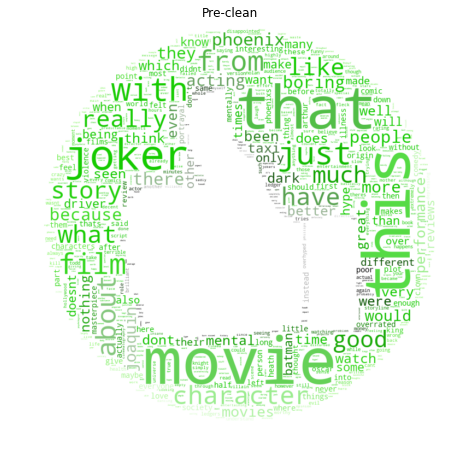

In [104]:
create_word_cloud_with_mask('thumbup.png', big_bow_n, 750, "Pre-clean")

In [105]:
big_bow_n

Counter({'missed': 5,
         'opportunity': 4,
         'been': 35,
         'very': 27,
         'excited': 5,
         'this': 250,
         'movie': 256,
         'ever': 6,
         'since': 6,
         'heard': 2,
         'about': 75,
         'anticipating': 1,
         'release': 2,
         'when': 25,
         'started': 4,
         'getting': 7,
         'type': 5,
         'hype': 21,
         'press': 1,
         'that': 213,
         'became': 8,
         'apprehensive': 1,
         'things': 14,
         'were': 26,
         'being': 26,
         'said': 12,
         'which': 32,
         'seemed': 3,
         'outrageous': 1,
         'mostly': 1,
         'other': 21,
         'moves': 3,
         'looking': 6,
         'forward': 4,
         'seeing': 11,
         'ended': 1,
         'letting': 3,
         'down': 14,
         'joker': 197,
         'sadly': 6,
         'turned': 2,
         'those': 11,
         'movies': 38,
         'know': 22,
         'many': 